Code that takes a PRo3D dip and strike output json file and puts it in the format of Dave's planeview plotter

https://davenquinn.com/projects/attitude/plotter/

In [1]:
import pandas as pd
import json, glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#          blue       green      orange      red
colors = ['#1F77B4', '#2CA02C', '#FF7F0E',  '#FF0000',  '#9467BD',  ]
# color = '#1F77B4' #blue
# color = '#FF7F0E' #orange
# color = '#2CA02C' #green
# color = '#568961' #green
# color = '#FF0000' #red
# color = '#9467BD' #purple

f = '2b'

paths = glob.glob( 'C:/Users/cornell/Desktop/PRo3D/m27_Kodiak_100m_scalebar_flat/'+f+'*.json' )
paths = paths[:]

viridis = cm.get_cmap('viridis', 1  )
# rgbas   = viridis( range(len(paths)))

cs = []
gs = []

for i in range( len(paths)):
    
    group = paths[i].split('\\')[-1].split('.')[0]
    
#     color = matplotlib.colors.rgb2hex( rgbas[i] )

    if group[0] == '1': 
        color = colors[0]
    elif group[0] == '2': 
        if int( group[-1] ) <=2: 
            color = colors[1]   
        elif int( group[-1] ) <=7: 
            color = colors[2]       
        else: 
            color = colors[3]
            
    color = matplotlib.colors.rgb2hex( cm.viridis( i/len(paths) ) )
    cs.append( color )
    gs.append( group )
    
    with open( paths[i], 'r') as datafile:
        data = json.load(datafile)
        
    df = pd.DataFrame(data)[[ 'strike', 'dip', 'rake', 'max_angular_error', 'min_angular_error', ]]

    cutoff = 60
    df = df.drop(df[ df.max_angular_error > cutoff ].index)
    df["color"] = color
    df["group"] = group
    
    cmin, cmax = [10, 40 ]
#     d = viridis( df.dip )
#     for i in df.index.values:
#         df["color"][i] = matplotlib.colors.rgb2hex( cm.ocean(  ( df.dip[i] - cmin ) /( cmax - cmin )) )
#         df["color"][i] = matplotlib.colors.rgb2hex( cm.viridis( i/len(paths) ) )

#     path_csv  = path_json.split('.')[0]+'.csv'
#     df.to_csv( path_csv )

    # this line is need because the model had anon-standard rotation, remove if not necessary
    # df.strike = (df.strike-90)%360  

    dip    = np.sum(df.dip/df.max_angular_error**2)/np.sum(1/df.max_angular_error**2)
    strike = (np.sum(df.strike/df.max_angular_error**2)/np.sum(1/df.max_angular_error**2) +90 )%360


    print(df.to_csv(sep='	',index=False,header=False, float_format='%.3f'))
#     print( '{:.0f}° dip {:.0f}° strike N={:}'.format( dip, strike, df.shape[0] ), group   )
#     print( '{:.0f}° / {:.0f}°N'.format( dip, strike ), group   )

    

NameError: name 'cm' is not defined

[31.1047456430991, -133.681057903067, -25.140261431714]

In [177]:
ds = np.arange( cmin, cmax+1, 5)
cs = []
for i in range(len(ds)):
    cs.append( matplotlib.colors.rgb2hex( cm.viridis(  ( ds[i] - cmin ) /( cmax - cmin )) ) )
    
ds,cs

(array([10, 15, 20, 25, 30, 35, 40]),
 ['#440154', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725'])

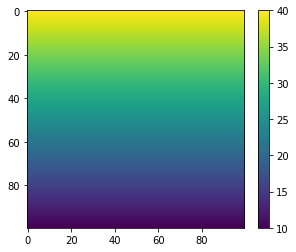

In [185]:
plt.figure( figsize= [5,4])
plt.imshow( np.meshgrid(np.linspace(cmin,cmax,100),np.linspace(cmax,cmin,100))[1] )
plt.colorbar()
plt.savefig( 'colorbar_{:}_to_{:}.png'.format(cmin,cmax), dpi=500,quality=90)

In [ ]:
53.660	6.852	1.570	1.976	0.336	#1F77B4	1a1
74.732	5.514	1.630	14.805	0.913	#1F77B4	1a1
26.610	3.697	1.533	5.589	0.814	#1F77B4	1a1
259.057	5.514	1.549	9.423	1.291	#1F77B4	1a1
39.323	4.405	1.549	38.471	1.390	#1F77B4	1a1
40.042	3.107	1.554	4.196	0.726	#1F77B4	1a1
328.708	3.922	1.503	5.532	1.144	#1F77B4	1a1
34.174	5.102	1.576	25.294	1.686	#1F77B4	1a1
160.095	3.469	1.623	13.513	0.752	#1F77B4	1a1
291.881	4.385	1.499	2.000	0.273	#1F77B4	1a1
14.658	5.467	1.555	16.965	1.084	#1F77B4	1a1
72.867	4.857	1.610	8.477	1.031	#1F77B4	1a1
50.689	1.568	1.567	11.853	0.926	#1F77B4	1a1
305.283	3.697	1.507	1.788	0.257	#1F77B4	1a1
23.500	3.540	1.539	16.950	0.655	#1F77B4	1a1
70.471	8.841	1.577	14.255	1.336	#1F77B4	1a1

65.469	2.575	1.599	32.688	2.823	#1F77B4	1a2
39.160	3.727	1.629	4.856	0.705	#1F77B4	1a2
43.807	5.028	1.617	4.665	1.119	#1F77B4	1a2
131.213	3.380	1.614	17.303	1.602	#1F77B4	1a2
49.106	6.342	1.675	20.237	1.715	#1F77B4	1a2
35.178	11.469	1.653	6.765	1.187	#1F77B4	1a2
34.279	4.149	1.615	8.566	1.865	#1F77B4	1a2
28.124	4.623	1.625	22.035	1.583	#1F77B4	1a2
34.286	5.944	1.659	31.842	1.555	#1F77B4	1a2
3.914	6.982	1.640	19.390	0.870	#1F77B4	1a2
127.808	3.239	1.615	10.871	1.128	#1F77B4	1a2
14.038	3.612	1.602	16.407	0.989	#1F77B4	1a2
41.516	14.415	1.654	57.175	2.986	#1F77B4	1a2
54.144	4.657	1.616	4.177	0.737	#1F77B4	1a2
30.186	4.138	1.619	16.628	2.238	#1F77B4	1a2
110.665	4.539	1.650	7.525	1.275	#1F77B4	1a2
22.601	10.237	1.540	9.375	0.870	#1F77B4	1a2
34.486	2.747	1.610	9.253	1.525	#1F77B4	1a2
96.939	2.740	1.616	4.044	1.909	#1F77B4	1a2
343.502	4.141	1.551	1.770	0.673	#1F77B4	1a2
7.286	5.241	1.626	14.247	1.364	#1F77B4	1a2
59.914	7.171	1.650	33.887	2.558	#1F77B4	1a2
77.104	2.788	1.617	33.060	1.296	#1F77B4	1a2
101.349	2.261	1.607	4.077	0.691	#1F77B4	1a2

160.474	8.142	1.559	4.057	0.364	#2CA02C	2a1
344.647	13.606	1.576	20.071	1.047	#2CA02C	2a1
84.434	5.362	1.638	8.162	0.765	#2CA02C	2a1
115.393	2.305	1.597	17.607	1.693	#2CA02C	2a1
186.941	0.681	1.566	6.895	1.680	#2CA02C	2a1

251.339	4.236	1.530	4.848	0.549	#FF7F0E	2a2
267.850	9.401	1.544	11.231	0.925	#FF7F0E	2a2
258.774	9.662	1.581	11.809	0.682	#FF7F0E	2a2
102.372	5.104	1.571	13.929	1.058	#FF7F0E	2a2
150.837	2.701	1.607	6.625	0.873	#FF7F0E	2a2
239.284	3.541	1.595	9.119	0.708	#FF7F0E	2a2
266.528	9.029	1.554	9.824	0.803	#FF7F0E	2a2
258.762	4.881	1.571	3.562	0.892	#FF7F0E	2a2
128.791	4.148	1.634	5.194	0.976	#FF7F0E	2a2

256.737	7.503	1.580	3.473	0.707	#FF7F0E	2a3
251.976	5.697	1.529	2.995	0.587	#FF7F0E	2a3
75.078	6.555	1.598	27.987	0.931	#FF7F0E	2a3
214.667	5.095	1.639	13.664	1.107	#FF7F0E	2a3

In [59]:
79.195	18.333	1.760	20.585	0.988	#1F77B4	1b1
81.348	18.860	1.811	52.765	6.213	#1F77B4	1b1
89.750	15.940	1.786	22.867	1.734	#1F77B4	1b1

36.069	22.421	1.923	19.179	0.753	#1F77B4	1b2
52.611	29.631	2.081	16.847	1.097	#1F77B4	1b2
29.336	39.280	2.122	34.238	0.767	#1F77B4	1b2
33.359	42.091	2.087	25.001	0.934	#1F77B4	1b2
62.828	31.488	2.120	19.749	0.871	#1F77B4	1b2
44.881	32.743	2.104	47.410	1.872	#1F77B4	1b2
44.560	35.214	2.147	11.930	0.545	#1F77B4	1b2
34.055	39.026	2.093	25.076	1.623	#1F77B4	1b2
56.586	32.592	1.963	6.833	1.827	#1F77B4	1b2
32.131	41.260	2.073	27.397	0.602	#1F77B4	1b2

46.788	22.429	1.847	10.357	1.055	#1F77B4	1b3
42.869	26.965	1.841	12.187	1.403	#1F77B4	1b3
35.429	24.029	1.976	7.951	2.063	#1F77B4	1b3
22.220	28.706	1.972	30.486	4.535	#1F77B4	1b3
53.230	18.246	1.729	13.102	1.914	#1F77B4	1b3
73.731	10.518	1.745	30.302	2.339	#1F77B4	1b3
42.958	24.493	1.834	7.461	0.943	#1F77B4	1b3
44.667	23.619	1.874	7.922	0.998	#1F77B4	1b3

76.125	15.431	1.840	5.135	1.016	#2CA02C	2b0
78.529	12.362	1.787	15.246	1.797	#2CA02C	2b0
71.463	15.853	1.819	9.593	0.915	#2CA02C	2b0

87.646	14.612	1.823	5.617	0.980	#2CA02C	2b1
79.394	17.494	1.850	2.970	1.280	#2CA02C	2b1
88.846	15.025	1.833	2.422	0.727	#2CA02C	2b1
116.773	22.085	1.889	16.778	0.839	#2CA02C	2b1
101.070	26.085	1.973	39.325	1.109	#2CA02C	2b1
84.188	14.666	1.812	3.777	1.536	#2CA02C	2b1
103.660	25.686	2.011	4.560	1.131	#2CA02C	2b1
159.507	32.644	1.889	51.942	1.405	#2CA02C	2b1
80.872	18.472	1.891	8.084	1.879	#2CA02C	2b1

104.813	30.399	2.059	57.073	2.820	#2CA02C	2b2
81.510	35.592	2.064	31.479	1.549	#2CA02C	2b2
102.662	32.874	2.144	4.835	0.764	#2CA02C	2b2
83.872	35.063	2.034	33.429	1.476	#2CA02C	2b2
93.122	31.628	2.047	25.544	1.181	#2CA02C	2b2
66.536	35.848	2.154	9.923	1.429	#2CA02C	2b2
85.064	31.770	1.979	21.027	1.421	#2CA02C	2b2
88.909	35.955	2.103	17.452	1.228	#2CA02C	2b2
114.300	36.969	2.102	19.756	2.293	#2CA02C	2b2
84.305	40.206	2.173	17.158	0.966	#2CA02C	2b2

70.124	27.993	2.050	10.723	1.083	#2CA02C	2b3
91.031	28.133	2.007	14.333	1.079	#2CA02C	2b3
70.779	28.465	2.039	27.847	1.816	#2CA02C	2b3

120.920	32.290	2.007	19.878	1.173	#FF7F0E	2b4
117.203	32.426	1.977	23.760	1.349	#FF7F0E	2b4

213.338	25.318	1.938	18.602	1.112	#FF7F0E	2b5
193.769	18.147	1.256	55.736	1.043	#FF7F0E	2b5
203.123	20.854	1.227	15.916	0.861	#FF7F0E	2b5

137.537	30.121	2.045	11.505	1.520	#FF7F0E	2b6
139.361	30.089	2.095	42.084	4.578	#FF7F0E	2b6

112.889	29.225	2.023	30.141	4.620	#FF7F0E	2b7
138.567	30.056	2.095	11.105	1.356	#FF7F0E	2b7
137.821	33.273	2.051	16.490	0.964	#FF7F0E	2b7
155.336	27.585	2.030	39.136	2.284	#FF7F0E	2b7
133.136	30.598	2.101	5.669	0.747	#FF7F0E	2b7

99.363	26.377	1.904	37.128	2.138	#FF0000	2b8
180.281	13.008	1.797	25.097	0.824	#FF0000	2b8

312.805	15.335	1.336	21.897	2.253	#FF0000	2b9
315.181	18.821	1.276	8.737	0.788	#FF0000	2b9
268.069	40.710	1.284	22.760	1.337	#FF0000	2b9
305.037	19.004	1.274	9.399	0.874	#FF0000	2b9
302.909	22.939	1.330	52.154	3.888	#FF0000	2b9
299.834	22.426	1.328	15.635	1.160	#FF0000	2b9
314.609	16.405	1.346	8.352	1.163	#FF0000	2b9
305.776	16.950	1.358	11.668	1.297	#FF0000	2b9
284.643	25.718	1.371	29.309	1.720	#FF0000	2b9
279.914	18.597	1.310	15.912	0.961	#FF0000	2b9

SyntaxError: invalid syntax (<ipython-input-59-69f248ac6707>, line 1)

In [ ]:
79.195	18.333	1.760	20.585	0.988	#001547	1b1
89.750	15.940	1.786	22.867	1.734	#003432	1b1

36.069	22.421	1.923	19.179	0.753	#001e69	1b2
52.611	29.631	2.081	16.847	1.097	#007ba7	1b2
33.359	42.091	2.087	25.001	0.934	#ffffff	1b2
62.828	31.488	2.120	19.749	0.871	#2793b7	1b2
44.560	35.214	2.147	11.930	0.545	#87c3d7	1b2
34.055	39.026	2.093	25.076	1.623	#e7f3f7	1b2
56.586	32.592	1.963	6.833	1.827	#42a0c0	1b2
32.131	41.260	2.073	27.397	0.602	#ffffff	1b2

46.788	22.429	1.847	10.357	1.055	#00206a	1b3
42.869	26.965	1.841	12.187	1.403	#005890	1b3
35.429	24.029	1.976	7.951	2.063	#003377	1b3
53.230	18.246	1.729	13.102	1.914	#001646	1b3
42.958	24.493	1.834	7.461	0.943	#00397b	1b3
44.667	23.619	1.874	7.922	0.998	#002f74	1b3

76.125	15.431	1.840	5.135	1.016	#003b2e	2b0
78.529	12.362	1.787	15.246	1.797	#006214	2b0
71.463	15.853	1.819	9.593	0.915	#003631	2b0

87.646	14.612	1.823	5.617	0.980	#004527	2b1
79.394	17.494	1.850	2.970	1.280	#00213f	2b1
88.846	15.025	1.833	2.422	0.727	#00402a	2b1
116.773	22.085	1.889	16.778	0.839	#001b67	2b1
84.188	14.666	1.812	3.777	1.536	#004527	2b1
103.660	25.686	2.011	4.560	1.131	#004885	2b1
80.872	18.472	1.891	8.084	1.879	#001448	2b1

102.662	32.874	2.144	4.835	0.764	#4ba5c3	2b2
93.122	31.628	2.047	25.544	1.181	#2a94b8	2b2
66.536	35.848	2.154	9.923	1.429	#96cbdc	2b2
85.064	31.770	1.979	21.027	1.421	#2d96b9	2b2
88.909	35.955	2.103	17.452	1.228	#99ccdd	2b2
114.300	36.969	2.102	19.756	2.293	#b4dae6	2b2
84.305	40.206	2.173	17.158	0.966	#ffffff	2b2

70.124	27.993	2.050	10.723	1.083	#006699	2b3
91.031	28.133	2.007	14.333	1.079	#00679a	2b3
70.779	28.465	2.039	27.847	1.816	#006c9d	2b3

120.920	32.290	2.007	19.878	1.173	#3c9ebe	2b4
117.203	32.426	1.977	23.760	1.349	#3f9fbf	2b4

213.338	25.318	1.938	18.602	1.112	#004382	2b5
203.123	20.854	1.227	15.916	0.861	#000a5c	2b5

137.537	30.121	2.045	11.505	1.520	#0381ab	2b6

138.567	30.056	2.095	11.105	1.356	#0381ab	2b7
137.821	33.273	2.051	16.490	0.964	#54aac6	2b7
133.136	30.598	2.101	5.669	0.747	#0f87af	2b7

180.281	13.008	1.797	25.097	0.824	#005a19	2b8

312.805	15.335	1.336	21.897	2.253	#003c2d	2b9
315.181	18.821	1.276	8.737	0.788	#000f4b	2b9
268.069	40.710	1.284	22.760	1.337	#ffffff	2b9
305.037	19.004	1.274	9.399	0.874	#000e4c	2b9
299.834	22.426	1.328	15.635	1.160	#00206a	2b9
314.609	16.405	1.346	8.352	1.163	#002f36	2b9
305.776	16.950	1.358	11.668	1.297	#00273b	2b9
284.643	25.718	1.371	29.309	1.720	#004a86	2b9
279.914	18.597	1.310	15.912	0.961	#001249	2b9

In [ ]:
58.475	8.623	1.652	10.980	1.664	#440154	1c1
58.278	5.990	1.627	10.306	1.560	#440154	1c1
85.178	6.574	1.655	3.033	0.851	#440154	1c1

20.980	6.353	1.641	11.960	1.290	#3b528b	2c1
154.826	6.765	1.635	10.826	0.913	#3b528b	2c1
8.239	12.572	1.644	19.547	1.515	#3b528b	2c1
161.438	7.739	1.631	10.480	0.717	#3b528b	2c1

323.417	3.462	1.545	20.338	0.741	#21918c	2c2
286.011	4.326	1.544	20.857	0.925	#21918c	2c2
219.609	4.440	1.511	43.410	1.571	#21918c	2c2
89.675	4.469	1.637	3.791	0.652	#21918c	2c2
141.375	3.761	1.549	20.512	0.871	#21918c	2c2

70.699	8.428	1.523	47.969	1.290	#5ec962	2c3

In [208]:
8.552	33.358	1.655	14.228	5.942	#440154	skirt_e
52.229	32.413	1.165	2.065	1.839	#440154	skirt_e
359.577	28.601	1.244	5.199	3.564	#440154	skirt_e
23.293	29.279	1.426	10.221	7.497	#440154	skirt_e
7.128	33.082	1.595	0.598	0.434	#440154	skirt_e
1.227	22.179	1.914	5.397	4.318	#440154	skirt_e
32.119	32.313	1.083	1.373	1.131	#440154	skirt_e
65.116	32.721	1.626	6.466	4.682	#440154	skirt_e
8.714	33.688	1.827	1.383	0.883	#440154	skirt_e
20.964	32.742	1.263	3.034	1.743	#440154	skirt_e
356.108	34.007	1.863	7.952	4.383	#440154	skirt_e
354.935	21.685	1.193	8.071	5.394	#440154	skirt_e
46.903	31.276	2.115	2.267	1.716	#440154	skirt_e
30.141	31.240	1.639	2.483	2.095	#440154	skirt_e
59.504	30.177	1.704	2.507	2.007	#440154	skirt_e
359.980	33.249	2.027	2.505	1.437	#440154	skirt_e
13.911	33.926	1.570	11.442	6.716	#440154	skirt_e

258.508	30.779	1.081	4.698	1.695	#3b528b	skirt_n
235.484	28.178	1.101	5.857	4.402	#3b528b	skirt_n
236.197	25.994	1.150	1.898	1.519	#3b528b	skirt_n
224.775	29.475	1.155	8.954	1.928	#3b528b	skirt_n
256.471	24.016	1.311	0.461	0.233	#3b528b	skirt_n
257.264	25.437	1.351	4.706	4.050	#3b528b	skirt_n
253.416	27.151	1.131	4.802	2.279	#3b528b	skirt_n
257.866	27.987	1.086	3.912	3.035	#3b528b	skirt_n
252.377	28.817	1.081	1.100	0.827	#3b528b	skirt_n
271.893	27.425	1.092	4.544	2.551	#3b528b	skirt_n
249.222	25.289	1.289	3.293	2.560	#3b528b	skirt_n
244.717	28.184	1.329	2.406	1.740	#3b528b	skirt_n
261.677	30.410	1.054	5.885	3.622	#3b528b	skirt_n
268.281	27.928	1.602	4.839	3.680	#3b528b	skirt_n
222.960	30.598	1.247	5.315	3.198	#3b528b	skirt_n
233.472	25.779	1.231	2.921	1.323	#3b528b	skirt_n
261.193	30.262	1.105	4.463	2.766	#3b528b	skirt_n
263.279	31.742	1.028	4.626	4.142	#3b528b	skirt_n
262.367	26.334	1.171	4.758	4.107	#3b528b	skirt_n
272.740	25.133	1.632	2.483	1.842	#3b528b	skirt_n
268.856	27.492	1.096	5.645	2.159	#3b528b	skirt_n

306.828	32.480	1.993	3.429	2.528	#21918c	skirt_ne
330.363	32.510	1.646	7.356	5.002	#21918c	skirt_ne
279.683	33.855	1.189	16.969	11.046	#21918c	skirt_ne
271.848	30.638	1.051	5.325	1.789	#21918c	skirt_ne
8.140	33.431	1.962	8.554	5.676	#21918c	skirt_ne
303.541	31.846	1.816	4.596	2.977	#21918c	skirt_ne

20.713	11.045	1.392	2.156	1.571	#5ec962	skirt_n_top
41.734	14.765	1.480	3.833	1.375	#5ec962	skirt_n_top
30.403	11.777	1.660	3.926	3.398	#5ec962	skirt_n_top
9.489	10.468	1.443	3.305	2.142	#5ec962	skirt_n_top
3.016	10.279	1.750	5.348	3.316	#5ec962	skirt_n_top
346.853	13.065	1.343	4.822	4.243	#5ec962	skirt_n_top
350.649	23.119	1.893	10.727	7.228	#5ec962	skirt_n_top
345.526	12.183	1.697	0.873	0.674	#5ec962	skirt_n_top
12.288	10.423	1.416	3.920	1.040	#5ec962	skirt_n_top
21.534	6.452	1.545	2.644	1.677	#5ec962	skirt_n_top
21.541	18.530	1.610	13.293	7.949	#5ec962	skirt_n_top
11.835	9.685	1.435	2.545	1.314	#5ec962	skirt_n_top
348.259	10.270	1.407	3.114	2.100	#5ec962	skirt_n_top

SyntaxError: invalid syntax (<ipython-input-208-ac574275c2f1>, line 1)

In [210]:
np.mean( [ 5.76, 5.76, 5.99, 5.9, 6.11, ]), np.mean( [ 4.04, 4.05, 3.63 ])

(5.903999999999999, 3.9066666666666663)

In [212]:
np.mean( [ 6.65, 7, 7.4, 8, ]),  np.mean( [ 6.7, 8, 7.3 , 8.7, 8.7, 9.4, 8 ])

(7.2625, 8.114285714285714)